/var/folders/9c/h9l66_v97j70dmz4qnxlhlhr0000gn/T/ipykernel_51194/3171160.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_aceptacion = resultados.groupby('rango_int_rc')['acepta'].mean().reset_index()


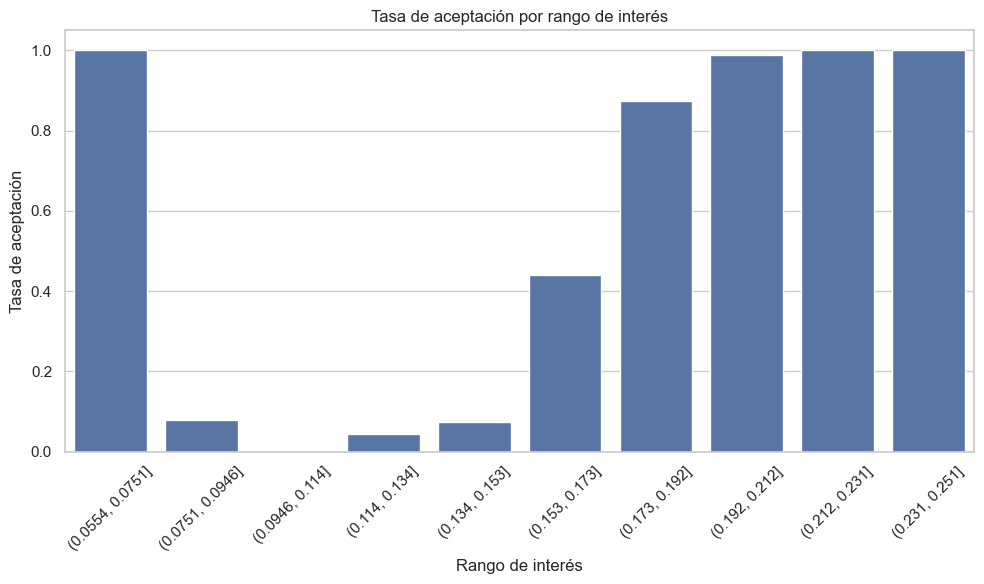

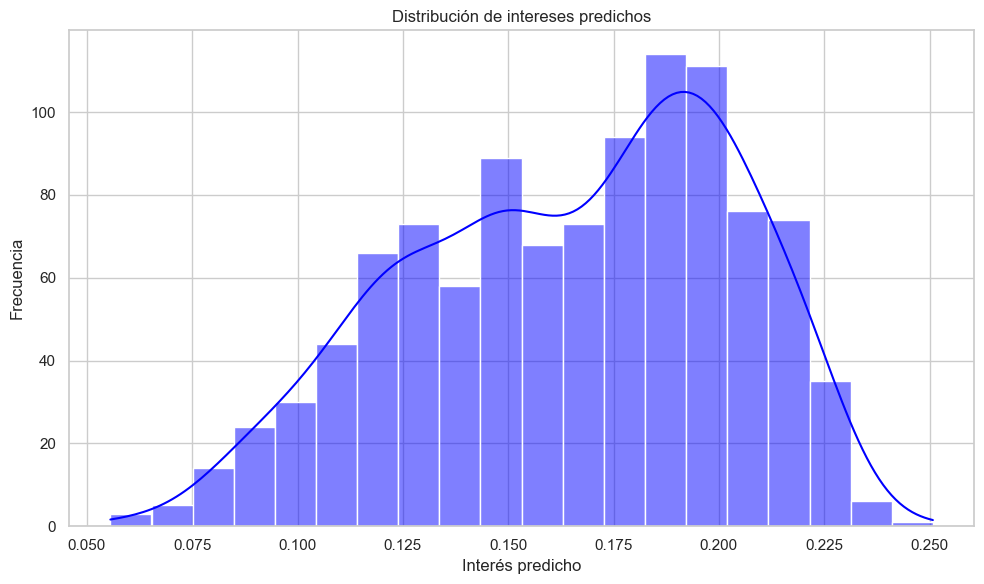

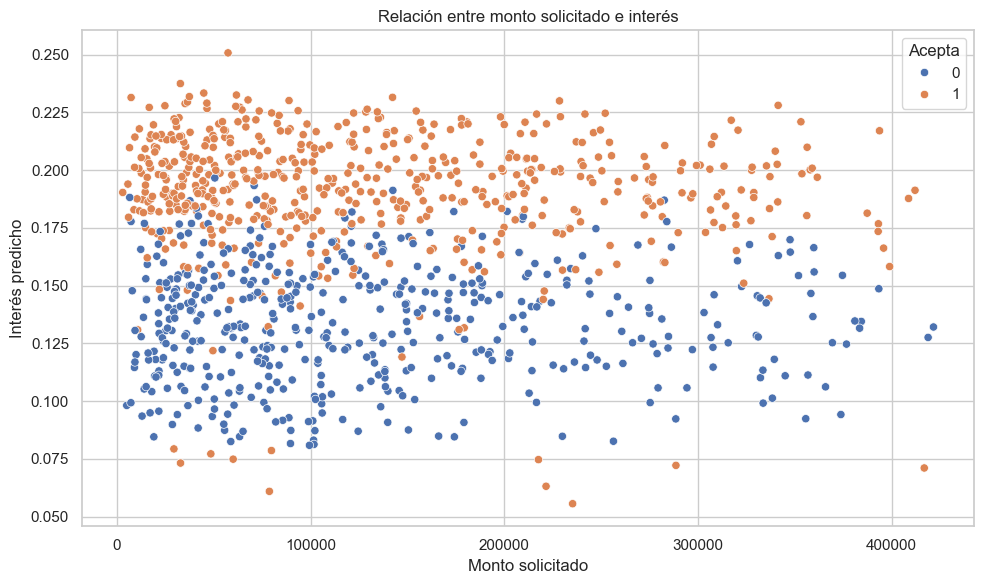

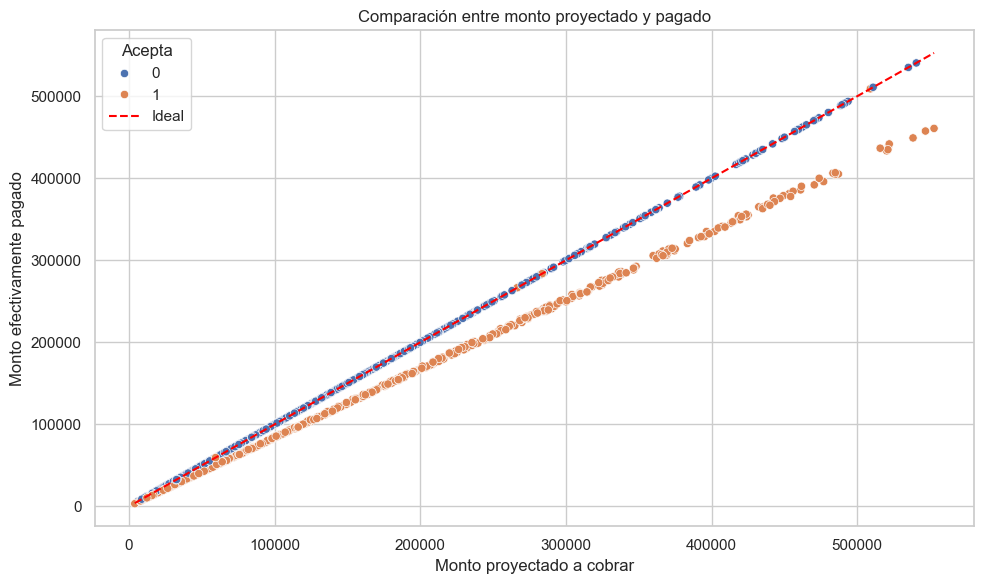

/var/folders/9c/h9l66_v97j70dmz4qnxlhlhr0000gn/T/ipykernel_51194/3171160.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_incumplimiento = resultados.groupby('rango_int_rc')['NoPaiFull'].mean().reset_index()


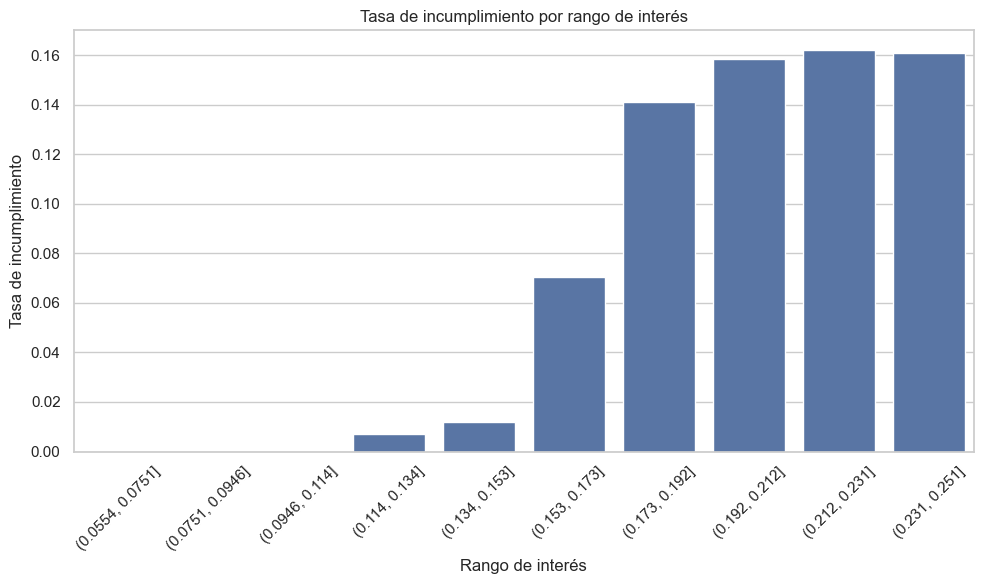

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos (asegúrate de que las rutas sean correctas)
predicciones_df = pd.read_excel("Predicciones.xlsx")
resultados_csv = pd.read_csv("resultados_grupo_7.csv")
resultados_xlsx = pd.read_excel("resultados_grupo_7.xlsx")

# Unir datos relevantes si es necesario (ejemplo)
resultados = resultados_csv.merge(predicciones_df, on="ID")

# Configuración general de gráficos
sns.set_theme(style="whitegrid")

# Gráfico 1: Tasa de aceptación por rango de interés
resultados['rango_int_rc'] = pd.cut(resultados['int_rc'], bins=10)
tasa_aceptacion = resultados.groupby('rango_int_rc')['acepta'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=tasa_aceptacion, x='rango_int_rc', y='acepta')
plt.xticks(rotation=45)
plt.title("Tasa de aceptación por rango de interés")
plt.xlabel("Rango de interés")
plt.ylabel("Tasa de aceptación")
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución de intereses predichos (int_rc)
plt.figure(figsize=(10, 6))
sns.histplot(resultados['int_rc'], bins=20, kde=True, color="blue")
plt.title("Distribución de intereses predichos")
plt.xlabel("Interés predicho")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Gráfico 3: Relación entre el monto solicitado y el interés
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resultados, x='NewLoanApplication', y='int_rc', hue='acepta')
plt.title("Relación entre monto solicitado e interés")
plt.xlabel("Monto solicitado")
plt.ylabel("Interés predicho")
plt.legend(title="Acepta")
plt.tight_layout()
plt.show()

# Gráfico 4: Comparación entre monto proyectado a cobrar y pagado
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resultados, x='monto_cobrar', y='pagado', hue='acepta')
plt.plot([resultados['monto_cobrar'].min(), resultados['monto_cobrar'].max()],
         [resultados['monto_cobrar'].min(), resultados['monto_cobrar'].max()],
         color='red', linestyle='--', label="Ideal")
plt.title("Comparación entre monto proyectado y pagado")
plt.xlabel("Monto proyectado a cobrar")
plt.ylabel("Monto efectivamente pagado")
plt.legend(title="Acepta")
plt.tight_layout()
plt.show()

# Gráfico 5: Tasa de incumplimiento por rango de interés
resultados['rango_int_rc'] = pd.cut(resultados['int_rc'], bins=10)
tasa_incumplimiento = resultados.groupby('rango_int_rc')['NoPaiFull'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=tasa_incumplimiento, x='rango_int_rc', y='NoPaiFull')
plt.xticks(rotation=45)
plt.title("Tasa de incumplimiento por rango de interés")
plt.xlabel("Rango de interés")
plt.ylabel("Tasa de incumplimiento")
plt.tight_layout()
plt.show()


In [4]:
# Análisis textual de resultados
def analizar_resultados(resultados):
    # 1. Tasa de aceptación global
    tasa_aceptacion_global = resultados['acepta'].mean()

    # 2. Promedio de interés predicho
    promedio_interes_predicho = resultados['int_rc'].mean()

    # 3. Relación entre monto solicitado e interés promedio
    promedio_interes_por_monto = resultados.groupby('NewLoanApplication')['int_rc'].mean()

    # 4. Diferencia promedio entre monto proyectado y monto pagado
    promedio_diferencia_montos = (resultados['monto_cobrar'] - resultados['pagado']).mean()

    # 5. Tasa de incumplimiento promedio
    tasa_incumplimiento_promedio = resultados['NoPaiFull'].mean()

    # 6. Segmentación por rango de interés (aceptación)
    resultados['rango_int_rc'] = pd.cut(resultados['int_rc'], bins=10)
    tasa_aceptacion_por_rango = resultados.groupby('rango_int_rc')['acepta'].mean()

    # 7. Segmentación por rango de interés (incumplimiento)
    tasa_incumplimiento_por_rango = resultados.groupby('rango_int_rc')['NoPaiFull'].mean()

    # Preparar análisis textual
    texto = f"""
    *** Análisis de Resultados ***

    1. Tasa de aceptación global:
       - {tasa_aceptacion_global:.2%} de los clientes aceptaron el crédito.

    2. Promedio de interés predicho:
       - La tasa de interés promedio predicha es de {promedio_interes_predicho:.2%}.

    3. Relación entre monto solicitado e interés promedio:
       - Intereses promedio según monto solicitado:
       {promedio_interes_por_monto.to_string()}

    4. Diferencia promedio entre monto proyectado y monto efectivamente pagado:
       - En promedio, la diferencia entre el monto proyectado y el efectivamente pagado fue de {promedio_diferencia_montos:.2f}.

    5. Tasa de incumplimiento promedio:
       - En promedio, el {tasa_incumplimiento_promedio:.2%} de los clientes incumplieron con el pago.

    6. Tasa de aceptación por rango de interés:
       - Aceptación por rango de interés:
       {tasa_aceptacion_por_rango.to_string()}

    7. Tasa de incumplimiento por rango de interés:
       - Incumplimiento por rango de interés:
       {tasa_incumplimiento_por_rango.to_string()}

    """
    print(texto)

# Llamar a la función con los resultados
analizar_resultados(resultados)



    *** Análisis de Resultados ***

    1. Tasa de aceptación global:
       - 54.16% de los clientes aceptaron el crédito.

    2. Promedio de interés predicho:
       - La tasa de interés promedio predicha es de 16.48%.

    3. Relación entre monto solicitado e interés promedio:
       - Intereses promedio según monto solicitado:
       NewLoanApplication
2978.0      0.190357
5046.0      0.098141
5658.0      0.193971
5982.0      0.179606
6498.0      0.209717
6573.0      0.188186
7200.0      0.099313
7260.0      0.177768
7293.0      0.231460
7884.0      0.147795
8772.0      0.182869
9012.0      0.114571
9100.0      0.201231
9252.0      0.214330
9282.0      0.116929
9330.0      0.130605
9858.0      0.120142
10380.0     0.187595
10695.0     0.130869
11288.0     0.200720
11556.0     0.217882
11664.0     0.182365
12279.0     0.165715
12495.0     0.127902
12522.0     0.205473
12570.0     0.198724
12958.0     0.093523
13314.0     0.187238
13658.0     0.181601
13680.0     0.136305
14040.0  

/var/folders/9c/h9l66_v97j70dmz4qnxlhlhr0000gn/T/ipykernel_51194/3059154617.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_aceptacion_por_rango = resultados.groupby('rango_int_rc')['acepta'].mean()
/var/folders/9c/h9l66_v97j70dmz4qnxlhlhr0000gn/T/ipykernel_51194/3059154617.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_incumplimiento_por_rango = resultados.groupby('rango_int_rc')['NoPaiFull'].mean()


/var/folders/9c/h9l66_v97j70dmz4qnxlhlhr0000gn/T/ipykernel_51194/686022987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rangos = resultados.groupby('rango_int_rc').agg({'acepta': 'mean', 'NoPaiFull': 'mean'}).reset_index()


<Figure size 1000x600 with 0 Axes>

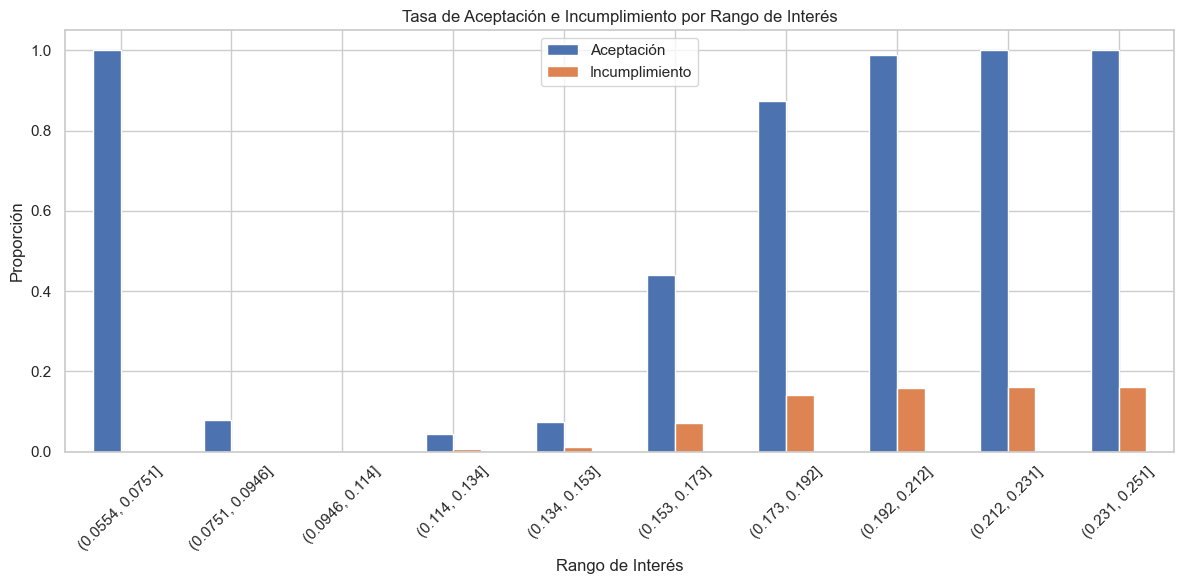

In [5]:
rangos = resultados.groupby('rango_int_rc').agg({'acepta': 'mean', 'NoPaiFull': 'mean'}).reset_index()
plt.figure(figsize=(10, 6))
rangos.plot(x='rango_int_rc', kind='bar', figsize=(12, 6), stacked=False)
plt.title("Tasa de Aceptación e Incumplimiento por Rango de Interés")
plt.xlabel("Rango de Interés")
plt.ylabel("Proporción")
plt.xticks(rotation=45)
plt.legend(["Aceptación", "Incumplimiento"])
plt.tight_layout()
plt.show()


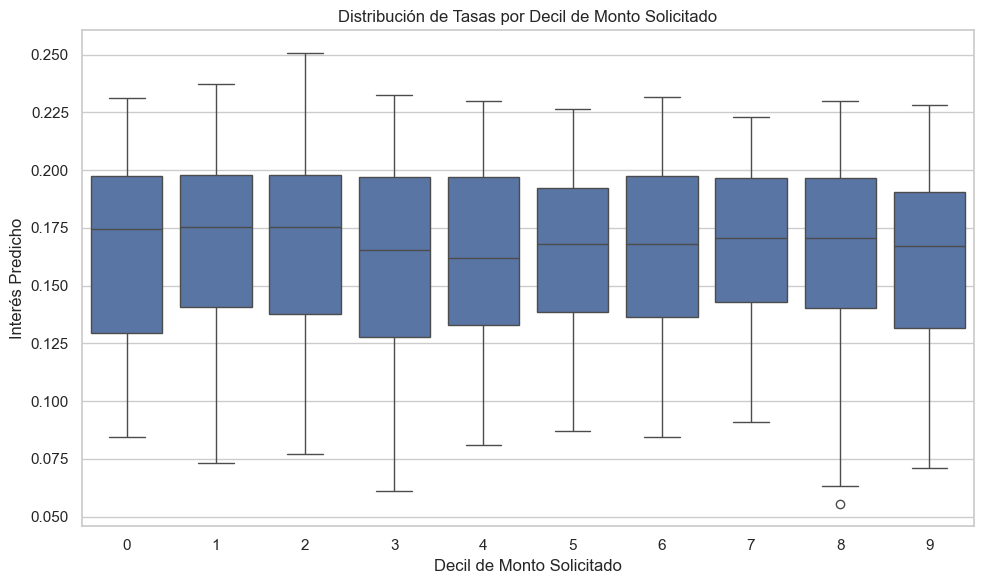

In [6]:
resultados['Decil_Monto'] = pd.qcut(resultados['NewLoanApplication'], 10, labels=False)
plt.figure(figsize=(10, 6))
sns.boxplot(data=resultados, x='Decil_Monto', y='int_rc')
plt.title("Distribución de Tasas por Decil de Monto Solicitado")
plt.xlabel("Decil de Monto Solicitado")
plt.ylabel("Interés Predicho")
plt.tight_layout()
plt.show()


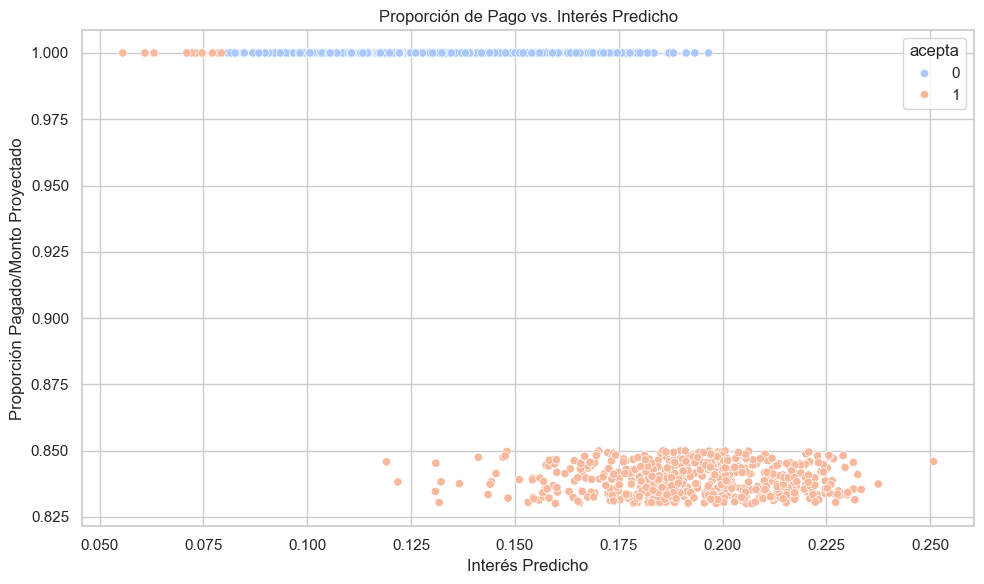

In [7]:
resultados['proporcion_pagado'] = resultados['pagado'] / resultados['monto_cobrar']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resultados, x='int_rc', y='proporcion_pagado', hue='acepta', palette="coolwarm")
plt.title("Proporción de Pago vs. Interés Predicho")
plt.xlabel("Interés Predicho")
plt.ylabel("Proporción Pagado/Monto Proyectado")
plt.tight_layout()
plt.show()


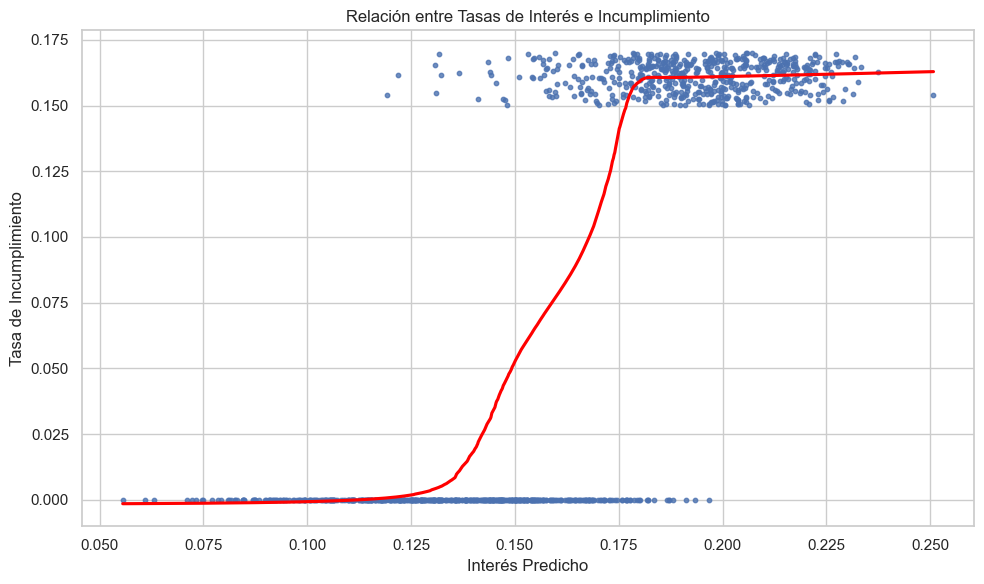

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(data=resultados, x='int_rc', y='NoPaiFull', lowess=True, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("Relación entre Tasas de Interés e Incumplimiento")
plt.xlabel("Interés Predicho")
plt.ylabel("Tasa de Incumplimiento")
plt.tight_layout()
plt.show()


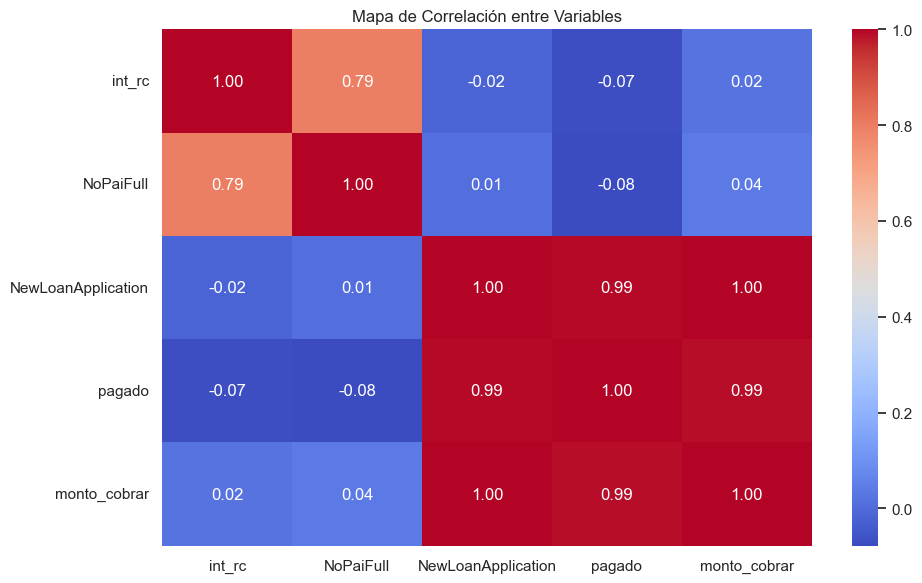

In [9]:
plt.figure(figsize=(10, 6))
correlaciones = resultados[['int_rc', 'NoPaiFull', 'NewLoanApplication', 'pagado', 'monto_cobrar']].corr()
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación entre Variables")
plt.tight_layout()
plt.show()


/var/folders/9c/h9l66_v97j70dmz4qnxlhlhr0000gn/T/ipykernel_51194/3728529573.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rangos = resultados.groupby('rango_int_rc').agg({'acepta': 'mean', 'NoPaiFull': 'mean'}).reset_index()


<Figure size 1000x600 with 0 Axes>

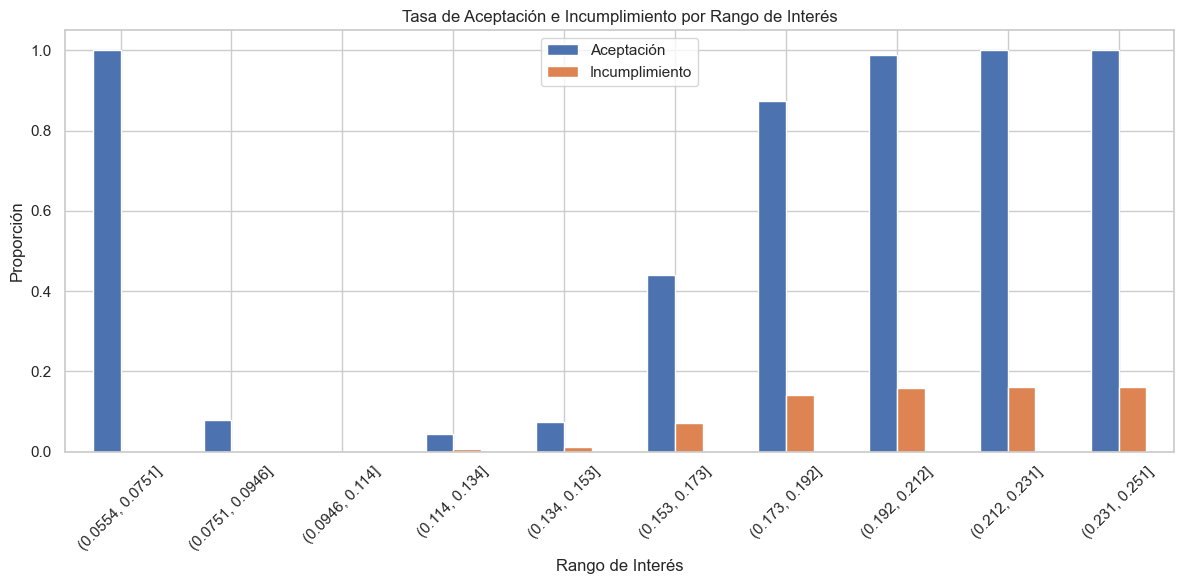

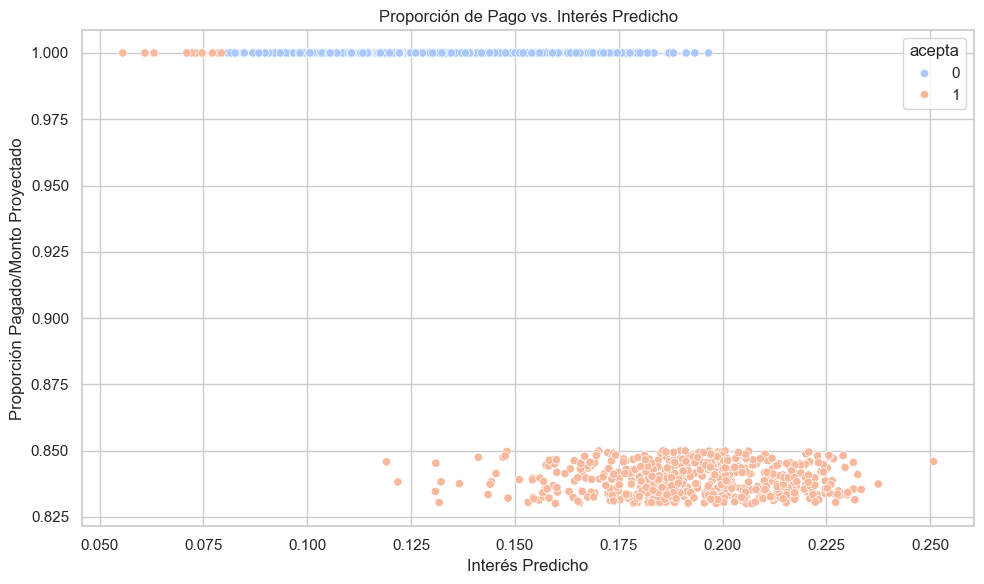

/var/folders/9c/h9l66_v97j70dmz4qnxlhlhr0000gn/T/ipykernel_51194/3728529573.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diferencia_por_decil, x='Decil_Interes', y='Diferencia', palette="rocket")


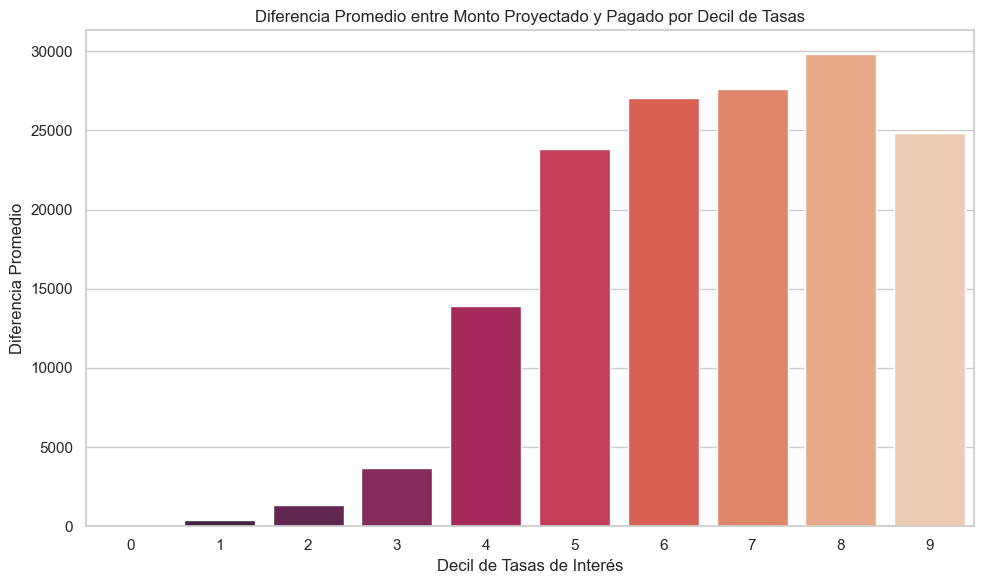

/var/folders/9c/h9l66_v97j70dmz4qnxlhlhr0000gn/T/ipykernel_51194/3728529573.py:43: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = resultados.pivot_table(values='NoPaiFull', index='rango_int_rc', columns='Decil_Monto', aggfunc='mean')


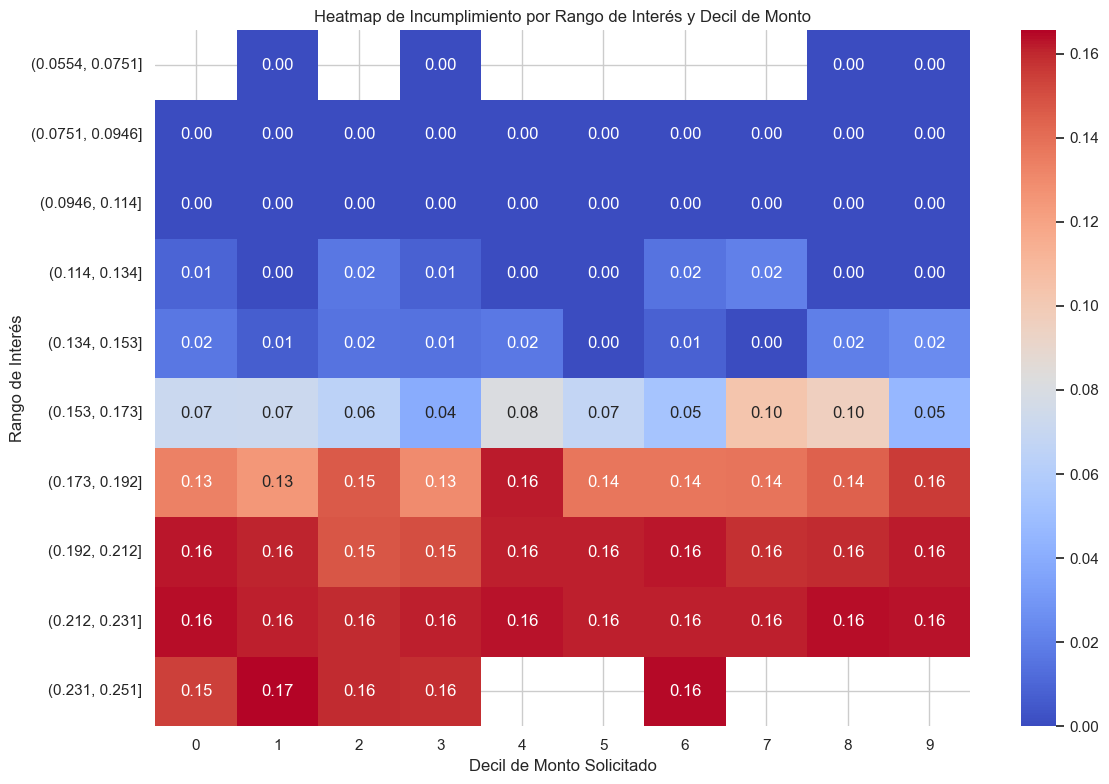

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo
sns.set_theme(style="whitegrid")

# *** GRÁFICO 1: Aceptación e Incumplimiento por Rango de Interés ***
rangos = resultados.groupby('rango_int_rc').agg({'acepta': 'mean', 'NoPaiFull': 'mean'}).reset_index()
plt.figure(figsize=(10, 6))
rangos.plot(x='rango_int_rc', kind='bar', figsize=(12, 6), stacked=False)
plt.title("Tasa de Aceptación e Incumplimiento por Rango de Interés")
plt.xlabel("Rango de Interés")
plt.ylabel("Proporción")
plt.xticks(rotation=45)
plt.legend(["Aceptación", "Incumplimiento"])
plt.tight_layout()
plt.show()

# *** GRÁFICO 2: Proporción de Pago vs. Interés Predicho ***
resultados['proporcion_pagado'] = resultados['pagado'] / resultados['monto_cobrar']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resultados, x='int_rc', y='proporcion_pagado', hue='acepta', palette="coolwarm")
plt.title("Proporción de Pago vs. Interés Predicho")
plt.xlabel("Interés Predicho")
plt.ylabel("Proporción Pagado/Monto Proyectado")
plt.tight_layout()
plt.show()

# *** GRÁFICO 3: Diferencia Promedio entre Monto Proyectado y Pagado por Decil de Tasas ***
resultados['Decil_Interes'] = pd.qcut(resultados['int_rc'], 10, labels=False)
resultados['Diferencia'] = resultados['monto_cobrar'] - resultados['pagado']
diferencia_por_decil = resultados.groupby('Decil_Interes')['Diferencia'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=diferencia_por_decil, x='Decil_Interes', y='Diferencia', palette="rocket")
plt.title("Diferencia Promedio entre Monto Proyectado y Pagado por Decil de Tasas")
plt.xlabel("Decil de Tasas de Interés")
plt.ylabel("Diferencia Promedio")
plt.tight_layout()
plt.show()

# *** GRÁFICO 4: Heatmap de Incumplimiento por Rango de Interés y Decil de Monto ***
heatmap_data = resultados.pivot_table(values='NoPaiFull', index='rango_int_rc', columns='Decil_Monto', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Incumplimiento por Rango de Interés y Decil de Monto")
plt.xlabel("Decil de Monto Solicitado")
plt.ylabel("Rango de Interés")
plt.tight_layout()
plt.show()
